3M rows | CPU: 0.33s | GPU: 4.93s | Speedup ≈ 0.1×
10M rows | CPU: 0.99s | GPU: 13.04s | Speedup ≈ 0.1×
30M rows | CPU: 2.97s | GPU: 39.26s | Speedup ≈ 0.1×


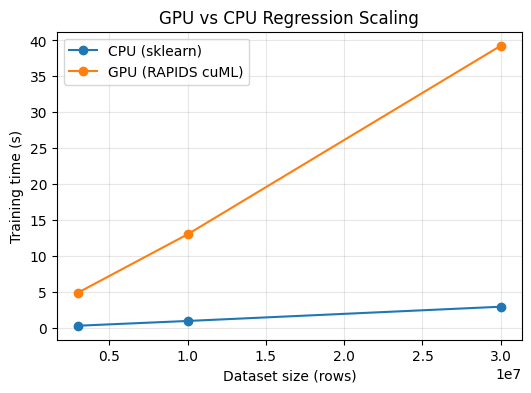

In [1]:
# RAPIDS Demo: GPU vs CPU Regression Benchmark
!pip install cudf-cu12 cuml-cu12 --extra-index-url=https://pypi.nvidia.com -q

import pandas as pd, numpy as np, time, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from cuml.linear_model import LinearRegression as cuLR
import cudf

def benchmark(n_rows):
    X_cpu = pd.DataFrame(np.random.rand(n_rows,3), columns=['a','b','c'])
    y_cpu = X_cpu['a']*3.5 + X_cpu['b']*2.1 + np.random.rand(n_rows)

    # CPU baseline
    t0 = time.time()
    LinearRegression().fit(X_cpu, y_cpu)
    cpu_t = time.time() - t0

    # GPU version
    X_gpu, y_gpu = cudf.DataFrame.from_pandas(X_cpu), cudf.Series(y_cpu)
    t1 = time.time()
    cuLR().fit(X_gpu, y_gpu)
    gpu_t = time.time() - t1

    return cpu_t, gpu_t

sizes = [3_000_000, 10_000_000, 30_000_000]
cpu_times, gpu_times = [], []

for s in sizes:
    cpu_t, gpu_t = benchmark(s)
    cpu_times.append(cpu_t)
    gpu_times.append(gpu_t)
    print(f"{s/1e6:.0f}M rows | CPU: {cpu_t:.2f}s | GPU: {gpu_t:.2f}s | Speedup ≈ {cpu_t/gpu_t:.1f}×")

# Plot scaling
plt.figure(figsize=(6,4))
plt.plot(sizes, cpu_times, 'o-', label='CPU (sklearn)')
plt.plot(sizes, gpu_times, 'o-', label='GPU (RAPIDS cuML)')
plt.xlabel("Dataset size (rows)")
plt.ylabel("Training time (s)")
plt.title("GPU vs CPU Regression Scaling")
plt.legend()
plt.grid(alpha=0.3)
plt.show()